## Objectives

The objective of this assignment is to learn about the data methodology and to use Python for data science. It will also help us be able to ask questions about data and find answers.

## Introduction

The purpose of this assignment is to produce a weather data set that allows us to answer the question whether is rains more in Seattle WA vs St. Louis MO

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation. You can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

However, for this clean up we will be using both sets from Dr. Brian Fischer in his github repository [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) which are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

In [4]:
type(df_seattle)

pandas.core.frame.DataFrame

Load the St. Louis data set

In [5]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

## Explore the contents of the data sets

In this part of the assigment we will be exploring the contents of the data set including variables, categories and values

In [57]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We can see that the data set has 10 categories for seattle

The info method is used to check the data types. 

For example, name.info() gives the size of the data frame, and numbers of missing values.

In [58]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [59]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
51540,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-01,NaN,NaN,0.0,0.0,0.0
51541,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-02,NaN,NaN,0.0,0.0,0.0
51542,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-03,NaN,NaN,0.0,0.0,0.0
51543,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-04,NaN,NaN,0.0,0.2,0.0
51544,USW00013994,"ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US",2018-01-05,NaN,NaN,0.0,0.0,0.0


Comparing both st louis & seattle we can see that the columns are not entirely the same for example seattle has two extra "WESD" & "WESF"

In [60]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [61]:
df_stlouis.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

We can also see that the St. Louis data set contains data from 2017, which we do not need.

Use the `info` method to check the data types, size of the DataFrame, and numbers of missing values.

In [62]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


We notice that the St. Louis data set is a lot larger due to many Stations and includes the year 2017


In [63]:
df_stlouis['STATION'].unique()

array(['USW00013994'], dtype=object)

In [64]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

In [65]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

Above shows both seattle & st. louis in comparisions to there stations

## Convert Data Types & Select relevant subsets of the data

In this section we will be converting the data and selecting relevant subsets in order to have a more accurate and detailed set

We are converting date to `datetime` types before plotting the data, because when dates are strings or objects, a plot will show successive values next to each other without recognizing possible gaps in dates.

In [15]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

Now down below we can see the difference

In [16]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Now we are converting the St. Louis `DATE` variable to datetime type.

In [17]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

In [18]:
df_seattle.head(30)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-06,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-07,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-08,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-12,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-03-13,NaN,NaN,0.00,NaN,NaN,NaN,NaN


## Remove unnecessary parts of the data sets

Since St. Louis data set contains data prior to 2018. We are going to limit the St. Louis data to 2018 and beyond.

In [19]:
df_stlouis = df_stlouis.loc[df_stlouis['DATE'] >= '2018-01-01']

In [20]:
df_stlouis['STATION'].value_counts()

USW00003960    1826
USW00013994    1826
USC00237398    1824
USC00237397    1824
US1MOSLC007    1819
USC00237452    1793
US1ILMD0010    1792
US1MOSL0024    1768
US1MOJF0018    1756
US1MOSL0027    1728
US1MOSL0074    1674
US1ILMD0012    1667
US1MOSL0004    1612
US1MOSL0049    1604
US1MOSL0018    1598
US1MOSL0055    1490
US1MOSL0050    1485
US1MOSS0027    1422
US1MOFSA189    1420
US1MOSL0077    1339
US1MOSL0020    1287
US1MOSL0039    1219
US1MOSL0067    1204
US1MOJF0025    1124
US1ILSC0009    1034
US1MOSL0081     914
US1MOSL0063     804
US1MOSL0083     646
US1MOSL0045     628
US1MOSL0062     621
US1MOSL0070     602
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1ILSC0018     237
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1ILMO0006     162
Name: STATION, dtype: int64

Because the St. Louis data set has values for many weather stations, while the Seattle data set has only one weather station. We are going to limit the data by focusing on the airport in St. Louis

We will focus on the data from the airport in St. Louis.

In [21]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [22]:
df_stlouis['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

## Identify and deal with missing values such as NaN values

There are two ways data can be missing from data values that are 'NaN' or values that are blank/missing 



In [23]:
df_seattle.head(2)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.0,NaN,NaN,NaN,NaN


### Finding the blank/missing values

We can use the `.info()` method to determine the number of non-null values in each column for both St. Louis & Seattle

In [24]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


The .sum() gives us a summary of returns a number, the sum of all items in an iterable

In [25]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

There have been (5 X 365) + 1 days from 2018 to 2022; meaning there should be that many data points

$$5 \times 365 + 1 = 1826$$

St. Louis data set is not missing any dates or precipitation values and did not have any 
`NaN` values of `DATE` or `PRCP`. Now we will check Seattle:

In [26]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


The Seattle data set is missing some dates and precipitation values. We could see this in the time series plot. There is a library 'missingno' to visualize where values are missing



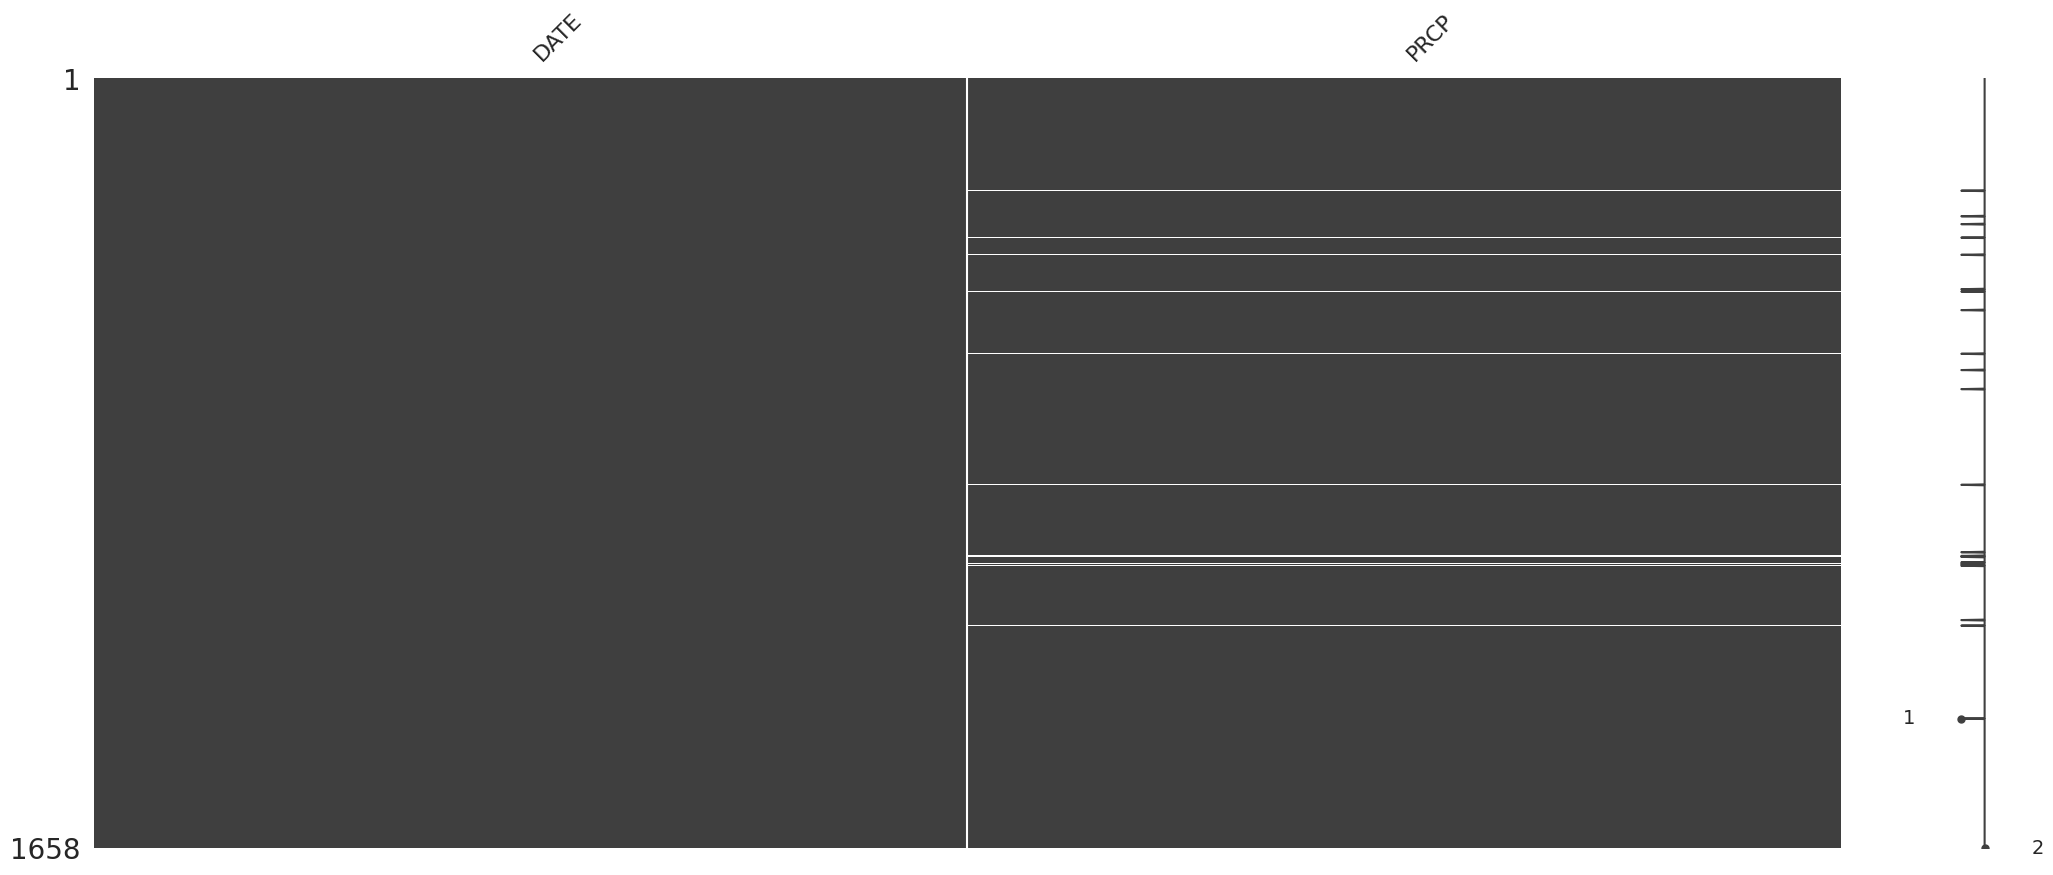

In [27]:
msno.matrix(df_seattle[['DATE','PRCP']]);

## Join the Seattle and St. Louis data frames, keeping only the date and precipitation values

St. Louis has data for all dates, so do a left join with St. Louis as the left data set.

In [28]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='left')

**Check the resulting data frame**

In [29]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


##Ensure that the data frame is in a tidy, or long, format.

This section will ensure that the data frame is in a long format. So each row is one time point per subject.

In [30]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

In [31]:
df

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.00
...,...,...,...
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62


In [32]:
df.loc[df['CITY'] == 'PRCP_x', 'CITY'] = 'STL'
df.loc[df['CITY'] == 'PRCP_y', 'CITY'] = 'SEA'

In [33]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [34]:
df.tail()

,DATE,CITY,PRCP
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


##Rename the columns to follow snake_case

In [66]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [67]:
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


##Creating derived variables that will be useful in the analysis

Rechecking the values before creating more variables

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [38]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [39]:
df.head(50)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


In [40]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


In [41]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [42]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

Here we are getting the mean for the precipitation

In [43]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

Now for each missing value that we found, we are replacing it with the daily mean precipitation found

In [44]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

Now we are going to make sure there are no null/missing data

In [45]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [47]:
df['month'] = pd.DatetimeIndex(df['date']).month
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


Here we are making a set of when the precipitation was greater than 0 so we can see when it just rained

In [48]:
df_more = df.loc[df['precipitation'] > 0, ['day_of_year', 'city', 'precipitation']]

df_more

,day_of_year,city,precipitation
6,7,STL,0.35
10,11,STL,0.04
13,14,STL,0.01
14,15,STL,0.06
21,22,STL,0.76
...,...,...,...
3647,361,SEA,0.78
3648,362,SEA,0.40
3649,363,SEA,0.03
3650,364,SEA,0.62


## Export the clean .csv file

Creating the clean csv file and saving it

In [56]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 
files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>